# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

api_key = "17c89c963395f50724b97e69cfe2023d"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zoucheng
Processing Record 2 of Set 1 | moyamba
Processing Record 3 of Set 1 | fort bragg
Processing Record 4 of Set 1 | crane
Processing Record 5 of Set 1 | trinity beach
Processing Record 6 of Set 1 | warrnambool
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | kukshi
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | colachel
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | mir bachah kot
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | nikolo-berezovka
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | tabas
Processing Record 20 of Set 1 | landskrona
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | saint george's
Proces

Processing Record 41 of Set 4 | villa gesell
Processing Record 42 of Set 4 | kodinsk
Processing Record 43 of Set 4 | mandalgovi
Processing Record 44 of Set 4 | mitu
Processing Record 45 of Set 4 | vanimo
Processing Record 46 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 4 | kamphaeng phet
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | uturoa
Processing Record 0 of Set 5 | kumasi
Processing Record 1 of Set 5 | chachapoyas
Processing Record 2 of Set 5 | koundara
Processing Record 3 of Set 5 | atafu village
Processing Record 4 of Set 5 | buncrana
Processing Record 5 of Set 5 | nishinoomote
Processing Record 6 of Set 5 | lerwick
Processing Record 7 of Set 5 | el abiodh sidi cheikh
Processing Record 8 of Set 5 | hanceville
Processing Record 9 of Set 5 | lihue
Processing Record 10 of Set 5 | yeppoon
Processing Record 11 of Set 5 | gemena
Processing Record 12 of Set 5 | ternate
Processing Record 13 of Set 5 | franklin
Processing Recor

Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | sung noen
Processing Record 35 of Set 8 | la passe
Processing Record 36 of Set 8 | chonchi
Processing Record 37 of Set 8 | narrabri
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | fale old settlement
Processing Record 40 of Set 8 | kamaishi
Processing Record 41 of Set 8 | kolonia town
Processing Record 42 of Set 8 | saint-denis
Processing Record 43 of Set 8 | xapuri
Processing Record 44 of Set 8 | kaman
Processing Record 45 of Set 8 | wotho
Processing Record 46 of Set 8 | cafayate
Processing Record 47 of Set 8 | ulladulla
Processing Record 48 of Set 8 | papao
Processing Record 49 of Set 8 | husum
Processing Record 0 of Set 9 | copiapo
Processing Record 1 of Set 9 | turmalina
Processing Record 2 of Set 9 | gumdag
Processing Record 3 of Set 9 | paragominas
Processing Record 4 of Set 9 | kabare
Processing Record 5 of Set 9 | escarcega
Processing Record 6 of Set 9 | mahriz
Processing Record 7 of Set

City not found. Skipping...
Processing Record 24 of Set 12 | ormara
Processing Record 25 of Set 12 | as samawah
Processing Record 26 of Set 12 | tromso
Processing Record 27 of Set 12 | kirakira
Processing Record 28 of Set 12 | orenburg
Processing Record 29 of Set 12 | canutama
Processing Record 30 of Set 12 | salinopolis
Processing Record 31 of Set 12 | vangviang
Processing Record 32 of Set 12 | fort irwin
Processing Record 33 of Set 12 | sanctuary point
Processing Record 34 of Set 12 | sumbawanga
Processing Record 35 of Set 12 | ntoum
Processing Record 36 of Set 12 | mumford
Processing Record 37 of Set 12 | pont-eveque
Processing Record 38 of Set 12 | singkawang
Processing Record 39 of Set 12 | bathsheba
Processing Record 40 of Set 12 | motygino
Processing Record 41 of Set 12 | sodankyla
Processing Record 42 of Set 12 | sciacca
Processing Record 43 of Set 12 | aliwal north
Processing Record 44 of Set 12 | ishpeming
Processing Record 45 of Set 12 | larkird
Processing Record 46 of Set 1

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zoucheng,35.4006,116.9656,62.76,25,0,4.21,CN,1715528213
1,moyamba,8.1667,-12.4333,90.05,61,99,4.85,SL,1715528213
2,fort bragg,35.1390,-79.0060,76.82,34,0,11.50,US,1715528165
3,crane,31.3974,-102.3501,73.83,65,100,6.49,US,1715528172
4,trinity beach,-16.7888,145.6968,70.02,93,10,10.36,AU,1715528213


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\Gamer PC\Desktop\python_api_challenge\Starter_Code\output_data\cities.csv", index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\Gamer PC\Desktop\python_api_challenge\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zoucheng,35.4006,116.9656,62.76,25,0,4.21,CN,1715528213
1,moyamba,8.1667,-12.4333,90.05,61,99,4.85,SL,1715528213
2,fort bragg,35.1390,-79.0060,76.82,34,0,11.50,US,1715528165
3,crane,31.3974,-102.3501,73.83,65,100,6.49,US,1715528172
4,trinity beach,-16.7888,145.6968,70.02,93,10,10.36,AU,1715528213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

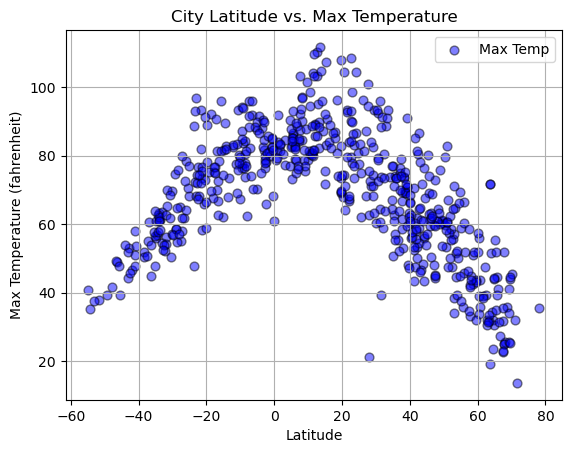

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], 
            color='blue', alpha=0.5, edgecolor='black', s=40, label='Max Temp')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (fahrenheit)')
plt.xlabel('Latitude')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig(r"C:\Users\Gamer PC\Desktop\python_api_challenge\Starter_Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

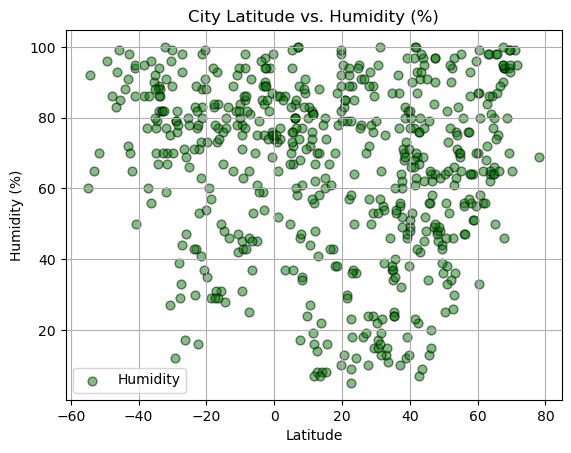

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
            color='green', alpha=0.5, edgecolor='black', s=40, label='Humidity')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig(r"C:\Users\Gamer PC\Desktop\python_api_challenge\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

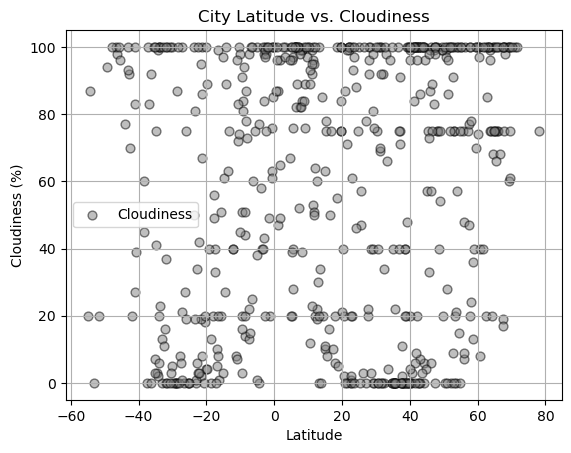

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
            color='gray', alpha=0.5, edgecolor='black', s=40, label='Cloudiness')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig(r"C:\Users\Gamer PC\Desktop\python_api_challenge\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

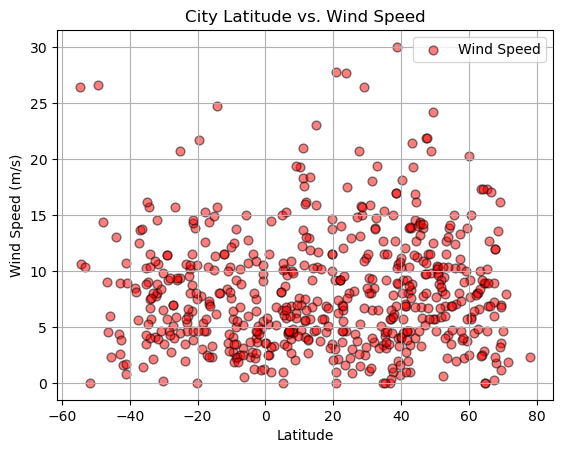

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
            color='red', alpha=0.5, edgecolor='black', s=40, label='Wind Speed')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig(r"C:\Users\Gamer PC\Desktop\python_api_challenge\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zoucheng,35.4006,116.9656,62.76,25,0,4.21,CN,1715528213
1,moyamba,8.1667,-12.4333,90.05,61,99,4.85,SL,1715528213
2,fort bragg,35.1390,-79.0060,76.82,34,0,11.50,US,1715528165
3,crane,31.3974,-102.3501,73.83,65,100,6.49,US,1715528172
6,aasiaat,68.7098,-52.8699,35.83,80,100,13.56,GL,1715528144


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,trinity beach,-16.7888,145.6968,70.02,93,10,10.36,AU,1715528213
5,warrnambool,-38.3833,142.4833,51.98,86,60,8.46,AU,1715528213
12,new norfolk,-42.7826,147.0587,53.10,98,92,2.59,AU,1715528157
14,port-aux-francais,-49.3500,70.2167,39.40,96,94,26.57,TF,1715528141
20,port alfred,-33.5906,26.8910,61.18,86,23,5.68,ZA,1715528142


###  Temperature vs. Latitude Linear Regression Plot

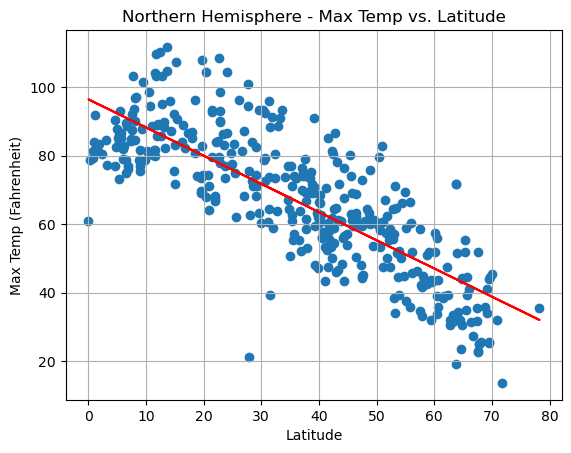

In [32]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                       'Northern Hemisphere - Max Temp vs. Latitude',
                       'Latitude', 'Max Temp (Fahrenheit)', (5, 0))


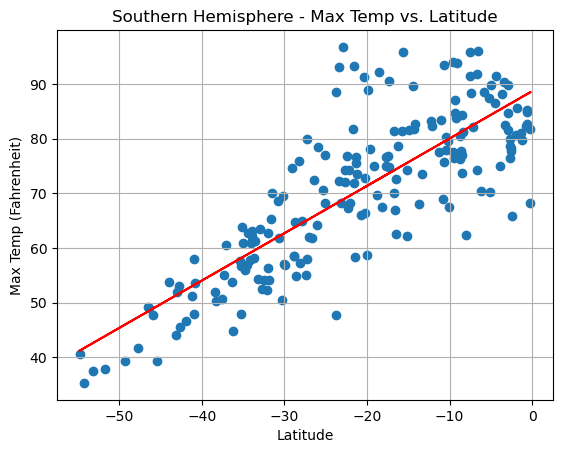

In [34]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Southern Hemisphere - Max Temp vs. Latitude',
                       'Latitude', 'Max Temp (Fahrenheit)', (-30, 5))



**Discussion about the linear relationship:** The two graphs show that temperature and latitude are closely correlated, where warmer temperatures are expected to be closer to the equator, while colder temperatures will exist on the poles. 

### Humidity vs. Latitude Linear Regression Plot

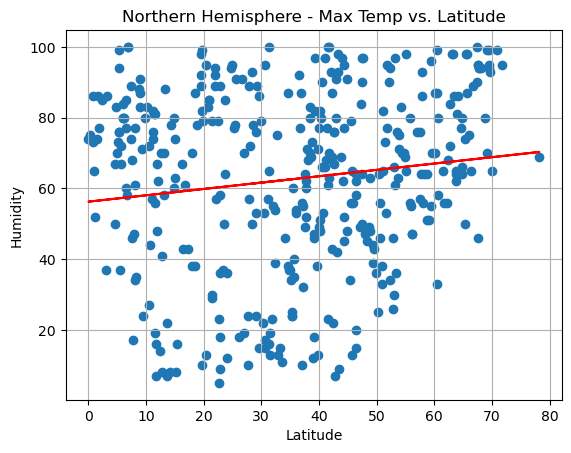

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Northern Hemisphere - Max Temp vs. Latitude',
                       'Latitude', 'Humidity', (5, 0))

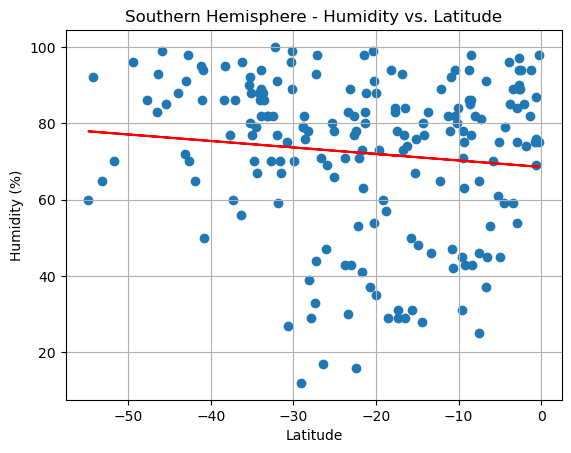

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Southern Hemisphere - Humidity vs. Latitude',
                       'Latitude', 'Humidity (%)', (-30, 5))

**Discussion about the linear relationship:** These linear regressions suggest that latitude/humidity are not correlated in any meaningful manner. 

### Cloudiness vs. Latitude Linear Regression Plot

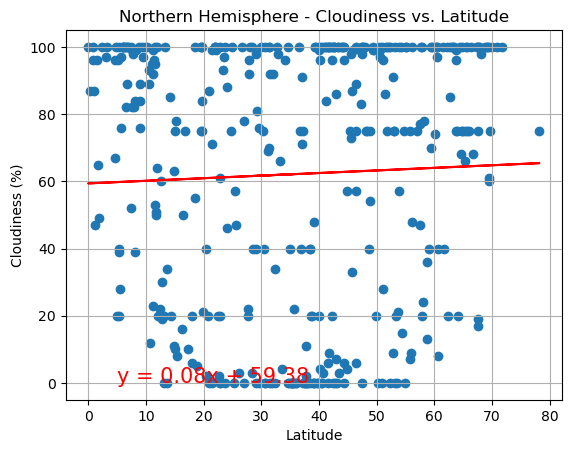

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Northern Hemisphere - Cloudiness vs. Latitude',
                       'Latitude', 'Cloudiness (%)', (5, 0))

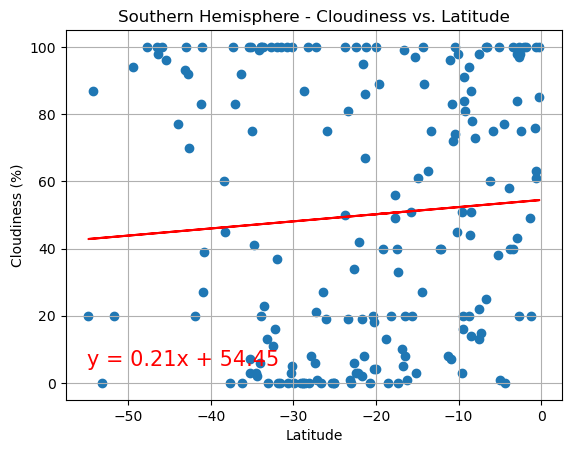

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Southern Hemisphere - Cloudiness vs. Latitude',
                       'Latitude', 'Cloudiness (%)', (-55, 5))

**Discussion about the linear relationship:** These linear regressions suggest that latitude/humidity are not correlated in any meaningful manner. 

### Wind Speed vs. Latitude Linear Regression Plot

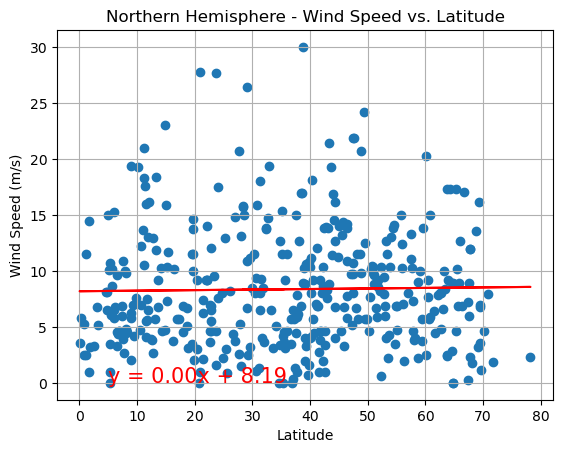

In [39]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Northern Hemisphere - Wind Speed vs. Latitude',
                       'Latitude', 'Wind Speed (m/s)', (5, 0))

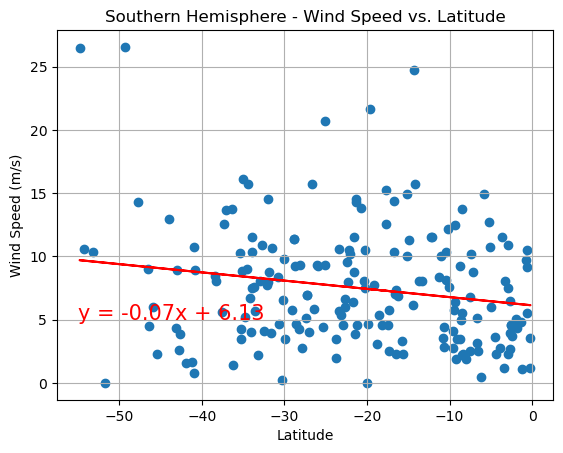

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Southern Hemisphere - Wind Speed vs. Latitude',
                       'Latitude', 'Wind Speed (m/s)', (-55, 5))

**Discussion about the linear relationship:** These linear regressions suggest that latitude/humidity are not correlated in any meaningful manner. 